<a href="https://colab.research.google.com/github/urvog/cancer-breast-classifier/blob/main/Unidad_I_KNN_Cancer_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practica - Breast Cancer Classifier

<img src="https://www.neuraldojo.org/media/cancer_classifier.jpg"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" width="100%"/>

Descripción:
El cáncer de mama es el cáncer más común entre las mujeres en el mundo. Representa el 25 % de todos los casos de cáncer y afectó a más de 2,1 millones de personas solo en 2015. Comienza cuando las células en el seno comienzan a crecer sin control. Estas células generalmente forman tumores que se pueden ver a través de rayos X o sentir como bultos en el área del seno.

Los desafíos clave contra su detección es cómo clasificar los tumores en **malignos** (cancerosos) o **benigno**s (no cancerosos). Te pedimos que completes el análisis de la clasificación de estos tumores mediante el aprendizaje automático (con KNN) y el conjunto de datos de Wisconsin (diagnóstico) de cáncer de mama.

Dataset:

Este conjunto de datos ha sido referido desde Kaggle.
https://www.kaggle.com/yasserh/breast-cancer-dataset?select=breast-cancer.csv


Objetivo:
- Comprender el conjunto de datos y la limpieza (si es necesario).
- Cree un modelo de clasificación para predecir si el tipo de cáncer es maligno o benigno.
- También ajuste los hiperparámetros si es necesario

In [ ]:
#importamos las libreias
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split


## 1.- Importación de datos

In [ ]:
#Importamos el Dataset
!wget https://www.neuraldojo.org/media/cancer/archive.zip
!unzip archive.zip

--2022-02-21 17:27:31--  https://www.neuraldojo.org/media/cancer/archive.zip
Resolving www.neuraldojo.org (www.neuraldojo.org)... 143.95.32.198
Connecting to www.neuraldojo.org (www.neuraldojo.org)|143.95.32.198|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49794 (49K) [application/zip]
Saving to: ‘archive.zip’

archive.zip         100%[===================>]  48.63K  --.-KB/s    in 0.1s    

2022-02-21 17:27:32 (435 KB/s) - ‘archive.zip’ saved [49794/49794]

Archive:  archive.zip
  inflating: breast-cancer.csv       


In [ ]:
#cargamos los datos en un dataframe
df = pd.read_csv('breast-cancer.csv')
df.shape

(569, 32)

## 2.- Analisis de los datos (EDA)

### 2.1 Inspección y Manipulación de los datos

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#verificamos que tipo de valores arroja la columna objetivo
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [ ]:
#revisemos los tipo de datos de  nuestro dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
#veamos algunas estadisticas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [ ]:
#eliminamos la columna id, ya que no aporta en nada al dataset
df = df.drop('id', axis = 1)

In [ ]:
#verificamos de nuevos
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 2.2 Verificación de valores nulos

In [ ]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### 2.3 Distribución y correlación de datos

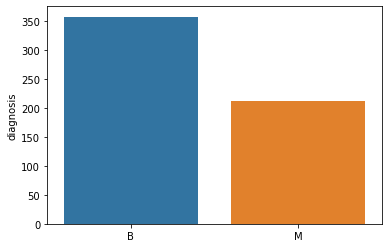

In [ ]:
#Ahora veamos como se distribuyen nuestras muestras con el valor objetivo
dist = df['diagnosis'].value_counts()
sns.barplot(x = dist.index, y=dist)

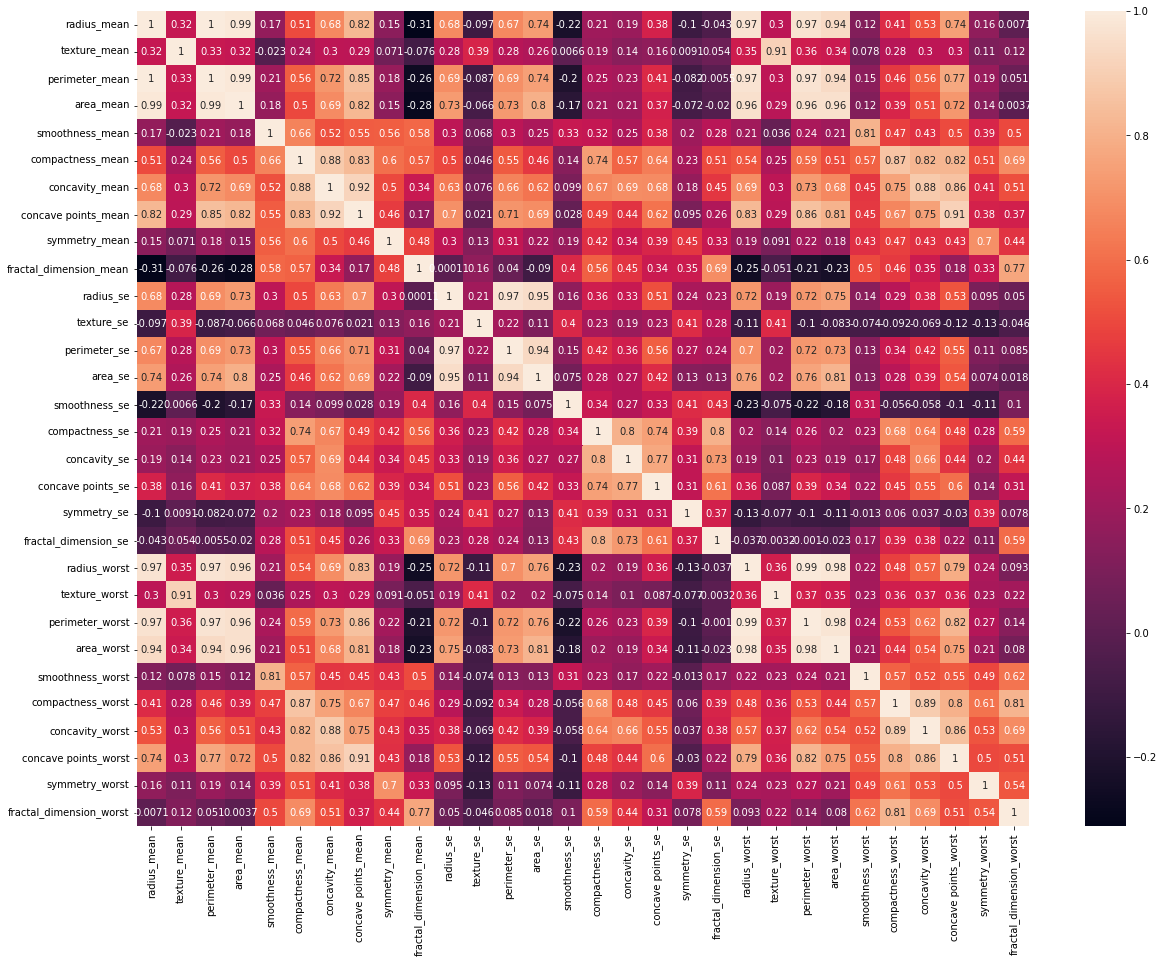

In [ ]:
#Revisemos la matriz de correlacion
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)  

In [ ]:
#como no es posible graficar todas las columnas del dataset, optamos por buscar aquellos atributos con mayor correlacion
high_correlation = df.corr().abs()
high_correlation.unstack().sort_values(ascending=False)[31:36]

perimeter_mean   radius_mean        0.997855
perimeter_worst  radius_worst       0.993708
radius_worst     perimeter_worst    0.993708
radius_mean      area_mean          0.987357
area_mean        radius_mean        0.987357
dtype: float64

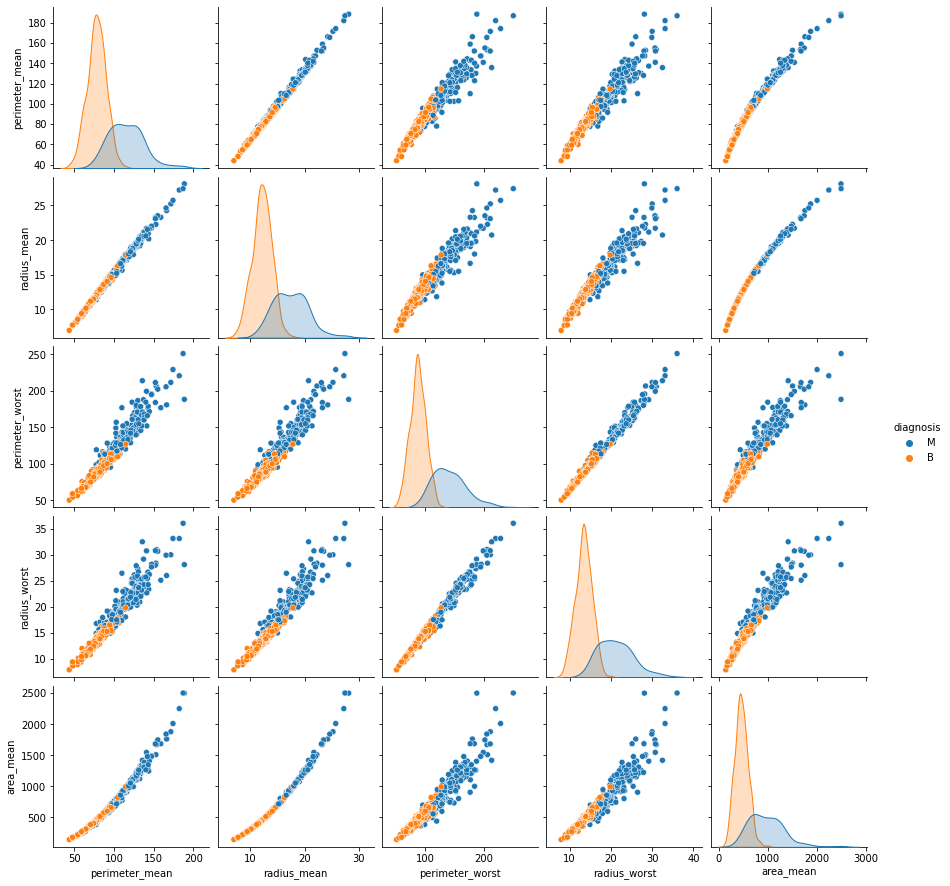

In [ ]:
#Ploteamos los atributos con mayor correlacion
sns.pairplot(data = df[['perimeter_mean','radius_mean','perimeter_worst','radius_worst','area_mean','diagnosis']], hue = 'diagnosis')

### 2.4 Division de nuestros datos en Train, Validación y Test

In [ ]:
#dividimos nuestro data set dos grupos preliminares de para entrenamiento y test, el dataset de test lo dejamos para el final de evaluación
test = df.iloc[-69:,:]
df_ = df.iloc[0:500,:]

In [ ]:
#Separamos nuestros datos en X y y, como los valores de Y son categoricos utilizamos un recurso de pandas que convierte en enteros los valores categoricos
X = df_.iloc[:,1:]
y = df_['diagnosis']
y = pd.get_dummies(y)['M']

In [ ]:
# Dividimos nuestro dataset en train y validacion, con una distribucion de 70% 30%
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0, test_size = 0.3)

##3.- Preparamos el Modelo

In [ ]:
#Entrenamos el modelo utilizando n = 5 (por defecto)
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5) #Default
knn.fit(X,y) 


KNeighborsClassifier()

## 4.- Evaluamos el Modelo

In [ ]:
print("Entrenamiento:",knn.score(X_train,y_train))
print("Evaluación:",knn.score(X_valid,y_valid))
print("Test:",knn.score(test.iloc[:,1:],pd.get_dummies(test['diagnosis'])['M']))

Entrenamiento: 0.9428571428571428
Evaluación: 0.94
Test: 0.9565217391304348


## 5.- Ajustamos Parametros

In [ ]:
#weights{‘uniform’, ‘distance’} or callable, default=’uniform’
#algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’

knn = KNeighborsClassifier(n_neighbors = 5, weights='uniform', algorithm='auto')
knn.fit(X,y) 
print("Entrenamiento:",knn.score(X_train,y_train))
print("Evaluación:",knn.score(X_valid,y_valid))
print("Test:",knn.score(test.iloc[:,1:],pd.get_dummies(test['diagnosis'])['M']))

Entrenamiento: 0.9428571428571428
Evaluación: 0.94
Test: 0.9565217391304348


In [ ]:
#ahora probemos con diferentes valores para neighbors
n_neighbors = [3,5,7,10,15,20]
d_scores = {}

for value in n_neighbors:
  knn = KNeighborsClassifier(n_neighbors = value)
  knn.fit(X,y) 
  scores = []
  scores.append(knn.score(X_train, y_train))
  scores.append(knn.score(X_valid, y_valid))
  scores.append(knn.score(test.iloc[:,1:],pd.get_dummies(test['diagnosis'])['M']))
  d_scores[value] = scores



In [ ]:
#imprimamos estos resultados
results = pd.DataFrame(d_scores).transpose().reset_index()
results.columns = ['n_neighbors','train','validation','test']
results

,n_neighbors,train,validation,test
0,3,0.951429,0.960000,0.913043
1,5,0.942857,0.940000,0.956522
2,7,0.945714,0.926667,0.942029
3,10,0.937143,0.933333,0.942029
4,15,0.937143,0.933333,0.971014
5,20,0.937143,0.920000,0.956522


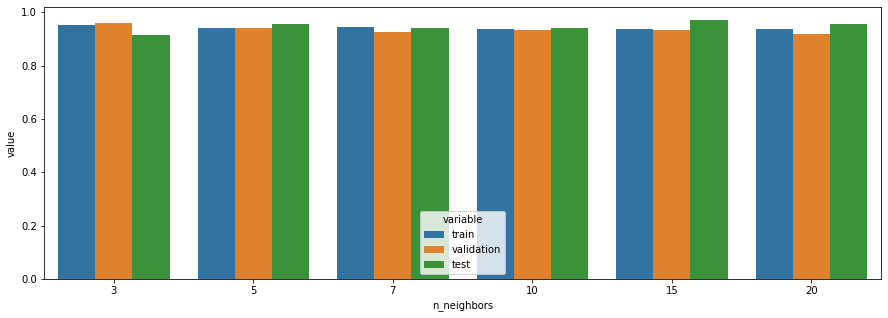

In [ ]:
#Graficamos los scores obtenidos para diferentes valores de K n_neighbors
df_scores = pd.melt(results, id_vars = 'n_neighbors', value_vars = results.iloc[1:])
plt.figure(figsize=(15,5))
sns.barplot(data = df_scores, x = 'n_neighbors', y = 'value', hue='variable')

##6.- Realizamos algunas predicciones

In [ ]:
knn.predict(test.iloc[:,1:])

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0], dtype=uint8)